In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
train_images = train_images.reshape((60_000, 784))  # 28*28=784
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10_000, 784))
test_images = test_images.astype("float32") / 255

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2561 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0687 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9887


In [15]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.9773710e-09, 2.8795575e-11, 5.9747879e-07, 8.1633862e-06,
       4.9106541e-13, 1.0687871e-08, 5.8468427e-15, 9.9999070e-01,
       1.1658829e-08, 5.7108906e-07], dtype=float32)

In [16]:
test_labels[0]

7

In [19]:
predictions[0].argmax()

7

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도 : {test_acc}")

313/313 [==============================] - 2s 1ms/step - loss: 0.0656 - accuracy: 0.9806
테스트 정확도 : 0.9805999994277954


In [21]:
import numpy as np


x = np.array(12)
x

array(12)

In [22]:
x.ndim

0

In [23]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [24]:
x.ndim

1

## 랭크-1 텐서는 딱 하나의 축을 가짐. 5개의 원소를 가졌으므로 5차원 벡터임. 5D벡터 != 5D텐서.

In [26]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

x.ndim  # 행렬 == 랭크-2 텐서

2

In [27]:
# 랭크-3 텐서

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.ndim

3

### 랭크-3 텐서들을 하나의 배열로 다시 합치면 랭크-4 텐서를 만드는 식으로 이어짐.
### 딥러닝에서는 보통 랭크0에서 4까지의 텐서를 다루며,
### 동영상 데이터를 다루는 경우에는 랭크-5 텐서까지 가기도 함.

In [34]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images.ndim

3

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
train_images.dtype

dtype('uint8')

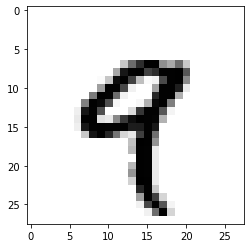

In [38]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [39]:
train_labels[4]

9

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 19s 1us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1654784/1641221 [==============================] - 2s 1us/step


In [3]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")